In [18]:

#setup 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#merge data
complete_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
#check number of unique mice IDS
unique_mice_IDs = complete_df["Mouse ID"].nunique()
unique_mice_IDs

249

In [10]:
#check for any mouse ID with duplicate time points then display the data associated with that mouse ID, and then create a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining steps.
duplicate_mice_IDs = complete_df.loc[complete_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_IDs

array(['g989'], dtype=object)

In [21]:
# Optional: Get all the data for the duplicate mouse ID

duplicate_mice = complete_df.loc[complete_df["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = complete_df[complete_df['Mouse ID'].isin(duplicate_mice_IDs)==False]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = cleaned_df["Mouse ID"].nunique()
unique_mice_count

248

In [29]:
#summary statistics 

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
var = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.

statistics_summary = pd.DataFrame({'Mean Tumor Volume' : mean, 'Median Tumor Volume' : median, 'Tumor Volume Variance': var, 'Tumor Volume Std. Dev.' : std, 'Tumor Volume Std. Err' : sem })
statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_mice_count = cleaned_df["Drug Regimen"].value_counts()


Text(0.5, 1.0, 'Number of Mice per Treatment')

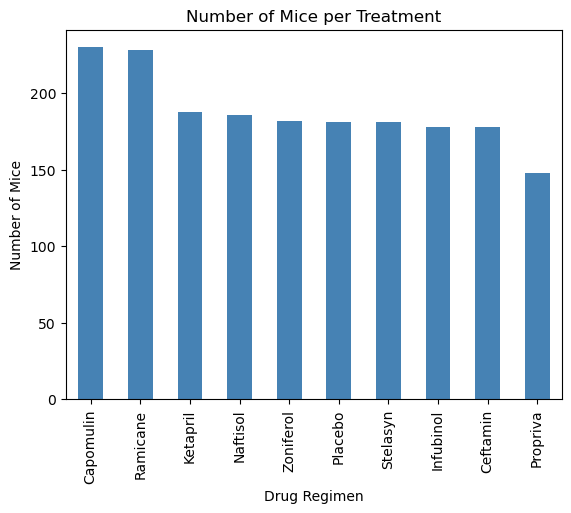

In [39]:
drug_regimen_bar = clean_mice_count.plot.bar(color='steelblue')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

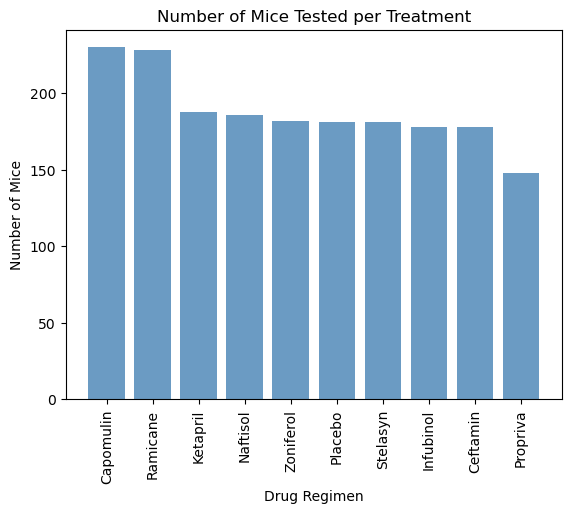

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_mice_count.index.values
y_axis = clean_mice_count.values

plt.bar(x_axis, y_axis, color='steelblue', alpha=0.8, align='center')

plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

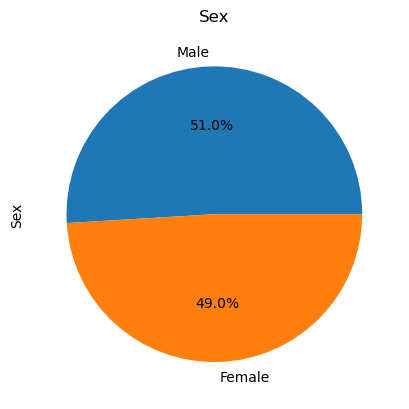

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie = cleaned_df['Sex'].value_counts()
plt.title('Sex')
gender_pie.plot.pie(autopct= "%1.1f%%")
plt.show()

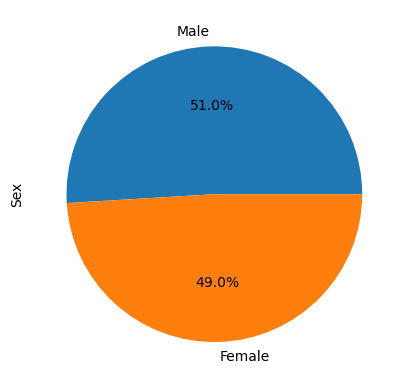

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot = gender_pie.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()



In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:   Capomulin, Ramicane, Infubinol, and Ceftamin
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments = cleaned_df[cleaned_df["Drug Regimen"].isin(treatments_list)]


In [85]:
capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
ramicane = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane"]
infubinol = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol"]
ceftamin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin"]
box_plot_df = pd.DataFrame({"Capomulin": capomulin["Tumor Volume (mm3)"],
         "Ramicane": ramicane["Tumor Volume (mm3)"],
          "Infubinol": infubinol["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin["Tumor Volume (mm3)"]})


,Capomulin,Ramicane,Infubinol,Ceftamin
0,NaN,45.000000,NaN,NaN
1,NaN,38.825898,NaN,NaN
2,NaN,35.014271,NaN,NaN
3,NaN,34.223992,NaN,NaN
4,NaN,32.997729,NaN,NaN
...,...,...,...,...
1868,NaN,NaN,54.316407,NaN
1869,NaN,NaN,56.286750,NaN
1870,NaN,NaN,58.628399,NaN
1871,NaN,NaN,60.053740,NaN


In [64]:
# Start by getting the last (greatest) timepoint for each mouse
last = treatments.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor =("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last = last.stack(level=0).unstack(level=0)
for treatments in treatments_list:
    print(treatments)

Capomulin
Ramicane
Infubinol
Ceftamin


In [76]:
# Put treatments into a list for for loop (and later for plot labels)   
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds
count = 0
for treatments in treatments_list:
    quartiles = last[treatments].quantile([.25,.5,.75]).round(2)
    lower_quartile = quartiles[0.25].round(2)
    upper_quartile = quartiles[0.75].round(2)
    interquartile_range = round(upper_quartile-lower_quartile,2)
    lower_outlier = round(lower_quartile - (1.5*interquartile_range),2)
    upper_outlier= round(upper_quartile + (1.5*interquartile_range),2)


    if count == 0:
        print(f"------------------------------------------------------------")
        print(f"{treatments}:")
    print(f"The lower quartile: {lower_quartile}")
    print(f"The upper quartile: {upper_quartile}")
    print(f"The interquartile range: {interquartile_range}")
    print(f"Values below {lower_outlier} could be possible outliers.")
    print(f"Values above {upper_outlier} could be possible outliers.")
    print(f"------------------------------------------------------------")
    treatment +=1 


------------------------------------------------------------
Capomulin:
The lower quartile: 32.38
The upper quartile: 40.16
The interquartile range: 7.78
Values below 20.71 could be possible outliers.
Values above 51.83 could be possible outliers.
------------------------------------------------------------
------------------------------------------------------------
Ramicane:
The lower quartile: 31.56
The upper quartile: 40.66
The interquartile range: 9.1
Values below 17.91 could be possible outliers.
Values above 54.31 could be possible outliers.
------------------------------------------------------------
------------------------------------------------------------
Infubinol:
The lower quartile: 54.05
The upper quartile: 65.53
The interquartile range: 11.48
Values below 36.83 could be possible outliers.
Values above 82.75 could be possible outliers.
------------------------------------------------------------
------------------------------------------------------------
Ceftamin:
The

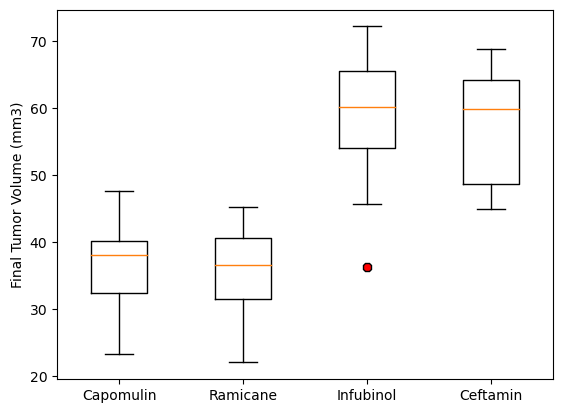

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
star = dict(markerfacecolor = "r", marker = "8")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(boxp, flierprops = star)
ax1.set_xticklabels(labels)
plt.show()

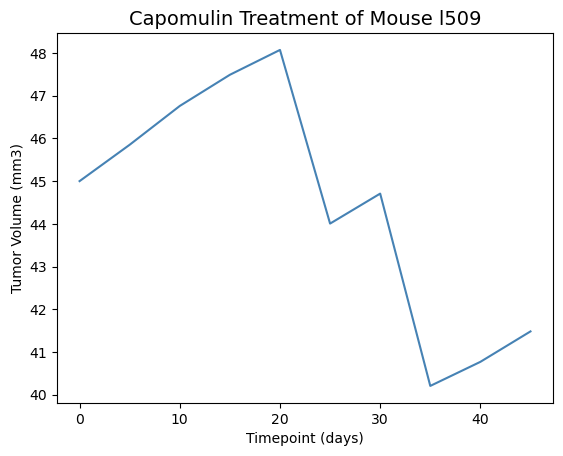

In [118]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 =  cleaned_df.loc[cleaned_df["Mouse ID"]=="l509"]
mouse_l509
plt.plot(mouse_l509["Timepoint"],mouse_l509["Tumor Volume (mm3)"], color = "steelblue")
plt.title("Capomulin Treatment of Mouse l509", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

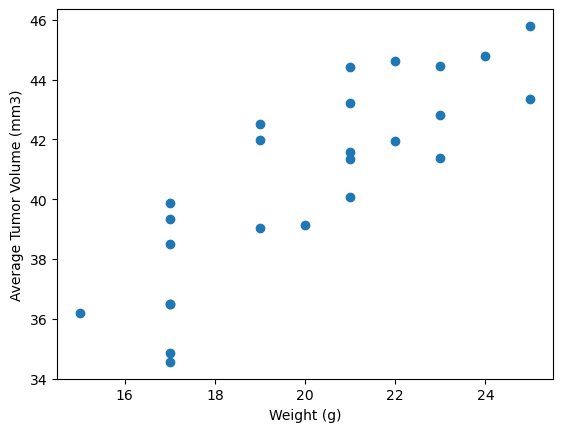

In [121]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
average_tumor = capomulin["Tumor Volume (mm3)"].mean()
weight = capomulin["Weight (g)"].unique()
plt.scatter(mouse_weight, average_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84.


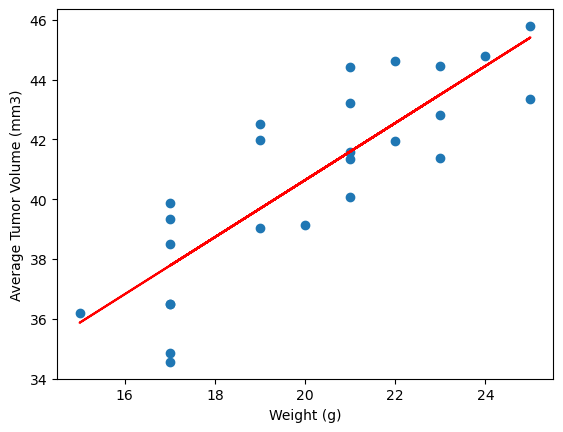

In [122]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = weight.astype(float)
correlation = st.pearsonr(weight, average_tumor)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, average_tumor)
regress = weight * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, average_tumor)
plt.plot(weight,regress,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()